In [16]:
import numpy as np
import gym

map_8x8 = [
    'SFFFFFFF',
    'FFFFFFFF',
    'FFFHFFFF',
    'FFFFFHFF',
    'FFFHFFFF',
    'FHHFFFHF',
    'FHFFHFHF',
    'FFFHFFFG'
]

map_10x10 = [
    'SFFFFFFFFF',
    'FFFFFFFFFF',
    'FFFHFFFFFF',
    'FFFFFFFFFF',
    'FFFFFFFFFH',
    'FFFHFFFFFF',
    'FFFFFFFFFF',
    'FFFFFHFFFF',
    'FFFFFFFHFF',
    'FFFFFFFFFG'
]

#"4x4"
env = gym.make('FrozenLake-v1', desc=map_8x8, is_slippery=True, render_mode="human")


action_size = env.action_space.n
state_size = env.observation_space.n
gamma = 0.9

# print(action_size)
#env.reset()
#env.render()

# randomAction= env.action_space.sample()
# returnValue = env.step(randomAction)
# #env.P[0][1]

transition_matrix = np.zeros((state_size, action_size, state_size)) # T -> SxAxS


for state in range(state_size):
    for action in range(action_size):
        for transition in env.P[state][action]:
            prob, next_state, _, _ = transition
            transition_matrix[state, action, next_state] += prob

In [17]:
print(transition_matrix[1])
print(transition_matrix.shape)

[[0.33333333 0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.         0.         0.
  0.         0.         0.         0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.     

In [30]:
# Define a random policy where every action has an equal probability
#policy = np.ones((state_size, action_size)) / action_size

policy = np.zeros((state_size, action_size))
policy[:,1] = 0.5
policy[:,3] = 0.5

#print(policy)

# Calculate the state transition probabilities under policy pi
P_pi = np.sum(policy[:, :, None] * transition_matrix, axis=1)

# Define the initial state distribution (assuming always starting from the first state)
s0 = np.zeros(state_size)
s0[0] = 1.0  # start from the first state

# Calculate the expected state visitation frequency
visitation_frequency = (1 - gamma) * np.dot(np.linalg.inv(np.eye(state_size) - gamma * P_pi), s0)

summ = sum(visitation_frequency)
print(visitation_frequency)
print(sum(visitation_frequency))

norm_visitation_frequency = visitation_frequency / summ

print(sum(norm_visitation_frequency))

[ 2.79653239e-01  1.32402351e-01  6.41888879e-02  3.14564259e-02
  1.56970924e-02  8.09064894e-03  4.51450150e-03  3.09115094e-03
  9.39238397e-02  6.25957375e-02  3.60194772e-02  1.84811192e-02
  9.85604067e-03  5.42382287e-03  3.21857538e-03  2.30521713e-03
  3.34665382e-02  2.50159315e-02  1.37872464e-02 -3.30688000e-18
  2.19996119e-03  1.91893810e-03  1.48458772e-03  1.22937821e-03
  1.22214753e-02  9.66957036e-03  5.86363546e-03  2.05083795e-03
  9.72491037e-04  5.23481427e-20  3.82043486e-04  4.62705743e-04
  4.22787249e-03  3.27764934e-03  1.86284012e-03  0.00000000e+00
  1.81636491e-04  9.96745129e-05  1.36957362e-04  1.65828283e-04
  9.53297651e-04  0.00000000e+00  1.87621729e-23  1.21056345e-05
  3.90698781e-05  2.73090471e-05  7.57679432e-21  3.72448550e-05
  2.20849881e-04  1.28349167e-20  2.49542793e-06  2.56447355e-06
 -4.07675947e-22  4.24604482e-06 -4.46305000e-21  7.98104036e-06
  7.73351296e-05  3.13561301e-05  1.15072391e-05 -5.03010327e-22
  3.52206483e-07  9.97918

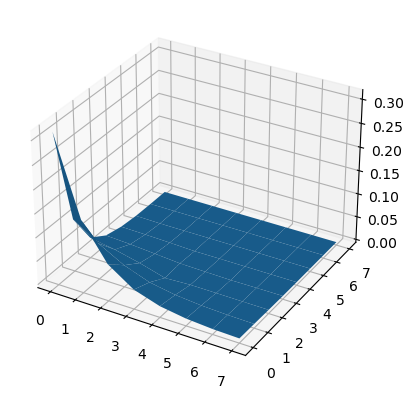

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Create X, Y coordinates
x = np.arange(int(np.sqrt(state_size)))
y = np.arange(int(np.sqrt(state_size)))
X, Y = np.meshgrid(x, y)

# Reshape visitation frequencies to a 2D grid
Z = norm_visitation_frequency.reshape((int(np.sqrt(state_size)), int(np.sqrt(state_size))))

# Plot a 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

plt.show()